# Winkans tussen spelers met verschillende handicap

Indien speler Twee een 1.1 hogere handicap heeft dan speler Eén en beiden dezelfde standaarddeviatie in scores hebben (2.9) dan heeft speler Twee 39% kans om te winnen.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# mijn laatste 20 scores 
results = np.array([3.5, 4.6, 3.1, 6.8, 2.4, 4, 6, 3.1, -3.4, 3.1, 4, -1.7, 11.4, 
           2.2, 2.7, 3.5, 5.5, 5.6, 3.5, 2.5])

In [3]:
# exact handicap op basis van beste 8 scores
np.mean(sorted(results)[:8])

1.3625

In [4]:
# gemiddelde en standaarddeviatie van alle resultaten
results.mean(), results.std()

(3.6199999999999997, 2.9073355499494724)

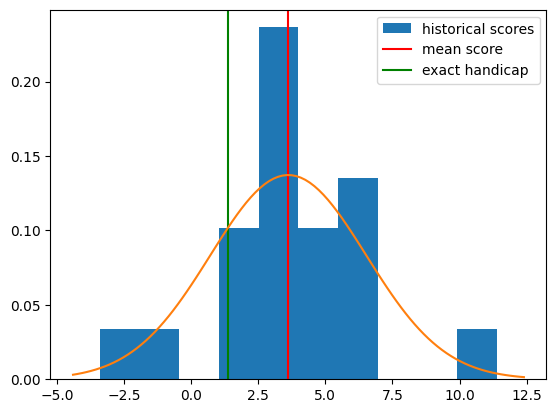

In [5]:
plt.hist(results, density=True, label='historical scores')
plt.axvline(results.mean(), color='red', label='mean score')
plt.axvline(np.mean(sorted(results)[:8]), color='green', label='exact handicap')

x = np.linspace(results.min()-1, results.max()+1, 100)
y = norm.pdf(x, loc=results.mean(), scale=results.std())
plt.plot(x, y)

plt.legend()
plt.show()

## Aannames

- speler 1 heeft 1.1 lagere handicap dan speler 2
- speler 1 heeft zelfde standaarddeviatie scores als speler 2

In [6]:
speler1_mean = results.mean() - 1.1
speler1_std = results.std()
speler2_mean = results.mean()
speler2_std = results.std()

speler1_mean, speler1_std, speler2_mean, speler2_std

(2.5199999999999996,
 2.9073355499494724,
 3.6199999999999997,
 2.9073355499494724)

## Kans om te winnen als speler 2 (speler met 1.1 hogere handicap)

In [7]:
som_kansen = 0  # is check
som_winkans_speler2 = 0

MIN_SCORE = -10
MAX_SCORE = 20
N = 1000
delta_score = (MAX_SCORE - MIN_SCORE) / (N-1)

# loop over all possible scores
for score in np.linspace(MIN_SCORE, MAX_SCORE, N):
    kans_op_score = norm.pdf(score, loc=speler1_mean, scale=speler1_std)
    winkans_speler2 = norm.cdf(score, loc=speler2_mean, scale=speler2_std)
    
    som_kansen += kans_op_score * delta_score
    som_winkans_speler2 += kans_op_score * delta_score * winkans_speler2
    
assert np.isclose(som_kansen, 1)

print(f"{som_winkans_speler2:.0%}")

39%


## Winkans bij ander verschil in handicaps

- aanname: beiden spelers hebben zelfde standaardeviatie

Resultaat is intuitief: Speler met hogere handicap heeft een grotere kans om te winnen wanneer standaardeviatie van scores hoger is (maar verliest uiteraard >50%).


### Notes

- spelers met dezelfde handicap kunnen prima heel andere standaarddeviatie in scores hebben
- doorgaans zullen spelers met een hogere handicap een grotere standaarddeviatie in scores hebben

In [8]:
def winkans_p2(hcp_diff=0, std=2.9):
    
    assert hcp_diff >= 0
    
    som_kansen = 0  # is check
    som_winkans_speler2 = 0

    MIN_SCORE = -100
    MAX_SCORE = 100
    N = 1000
    delta_score = (MAX_SCORE - MIN_SCORE) / (N-1)

    # loop over all possible scores
    for score in np.linspace(MIN_SCORE, MAX_SCORE, N):
        kans_op_score = norm.pdf(score, loc=0, scale=std)
        winkans_speler2 = norm.cdf(score, loc=hcp_diff, scale=std)

        som_kansen += kans_op_score * delta_score
        som_winkans_speler2 += kans_op_score * delta_score * winkans_speler2

    assert np.isclose(som_kansen, 1)

    return som_winkans_speler2

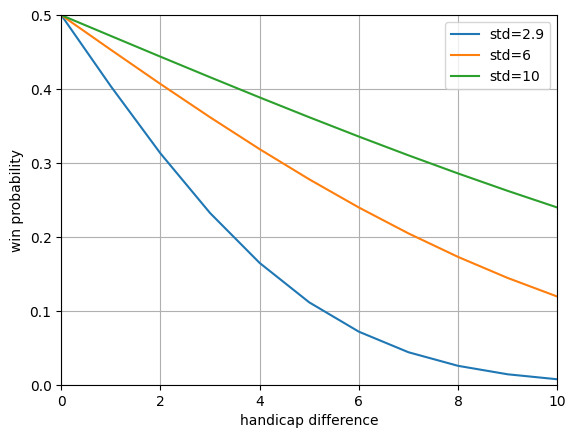

In [9]:
for std in [2.9, 6, 10]:
    diff = np.arange(0, 11)
    y = [winkans_p2(d, std) for d in diff]
    plt.plot(diff, y, label=f"{std=}")
    plt.ylabel('win probability')
    plt.xlabel('handicap difference')
    plt.xlim(0, 10)
    plt.ylim(0, 0.5)

plt.grid()
plt.legend()
plt.show()